In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [47]:
loan_dataset = pd.read_csv('/content/train_u6lujuX_CVtuZ9i.csv')

In [4]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [5]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
loan_dataset.shape

(614, 13)

In [8]:
loan_dataset.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

loan id is 614 which is equal to number of entries so no repitation(no duplicate rows).
Gender, Married, Education, Self Employed, Credit History and Loan Status are ordinal categories.
There are no zero variance predictors.

In [9]:
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


the mean of both applicant income and coapplicant income are greater than the median with a high standard deviation indicating positive skewness.
LoanAmount and loan amount term have moderate variablity.
the mean of credit history indicates that majority of the applicants have a credit history and hence indicates class imbalance.


In [10]:
#we can get all the column names of the dataframe
for column in loan_dataset:
  print(column)

Loan_ID
Gender
Married
Dependents
Education
Self_Employed
ApplicantIncome
CoapplicantIncome
LoanAmount
Loan_Amount_Term
Credit_History
Property_Area
Loan_Status


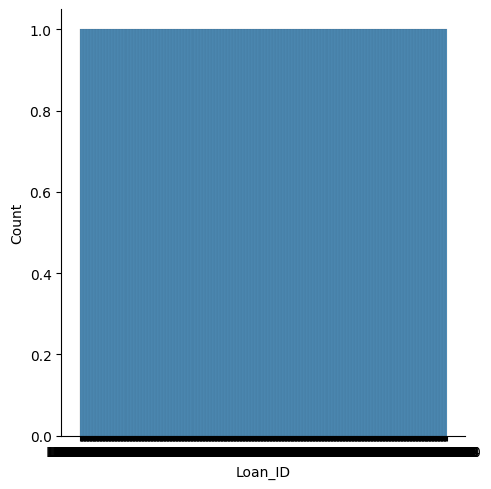

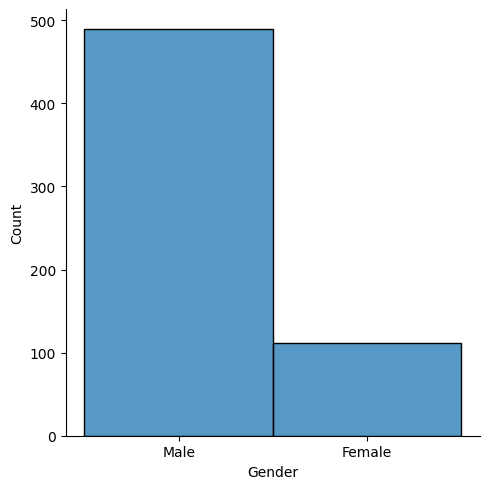

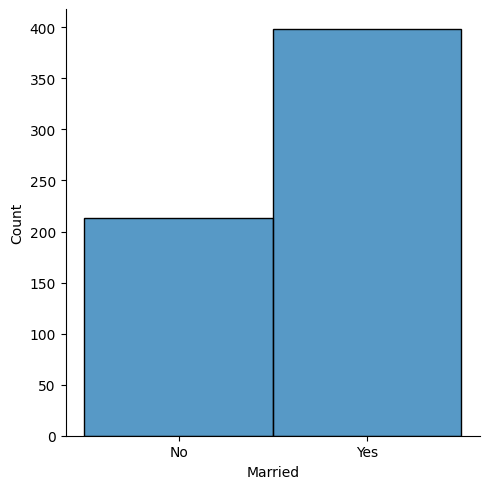

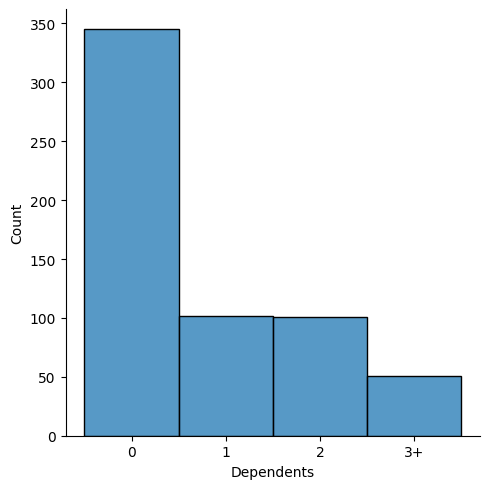

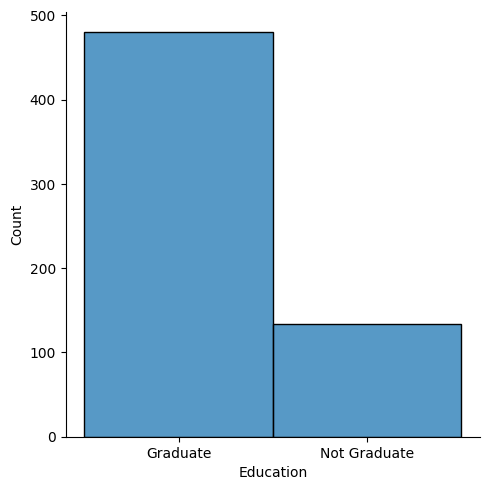

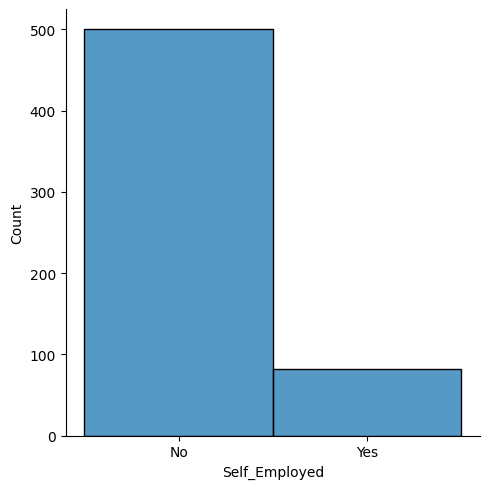

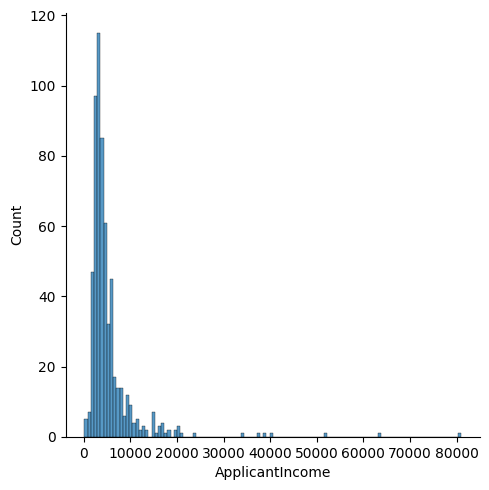

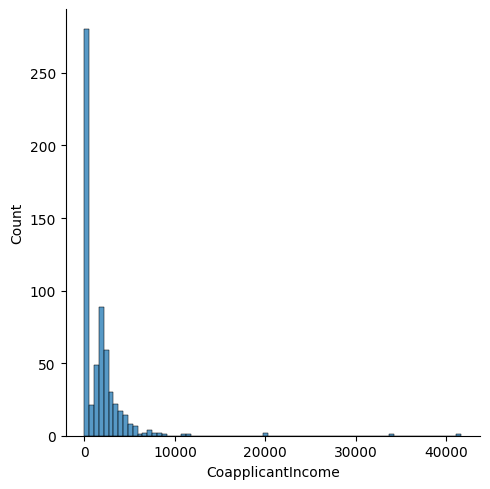

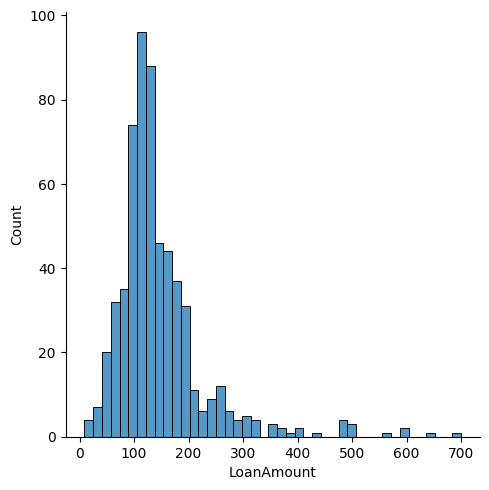

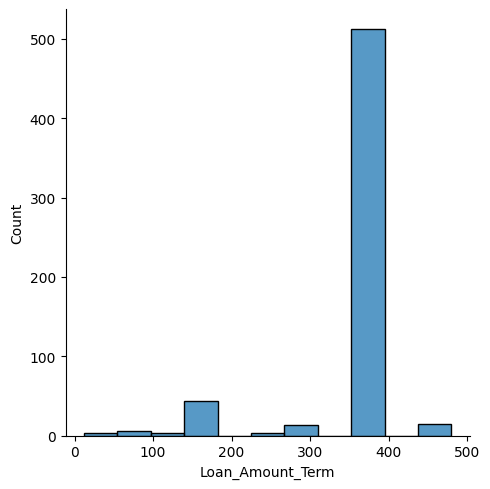

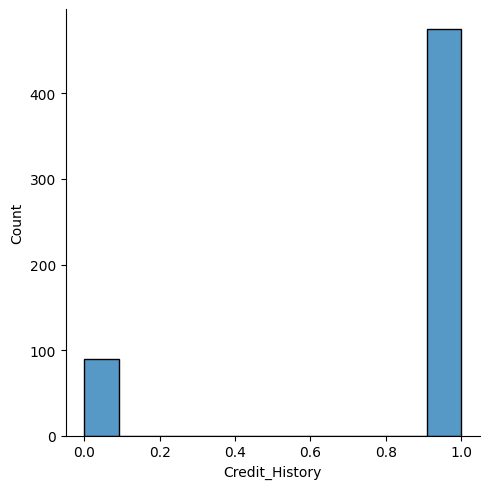

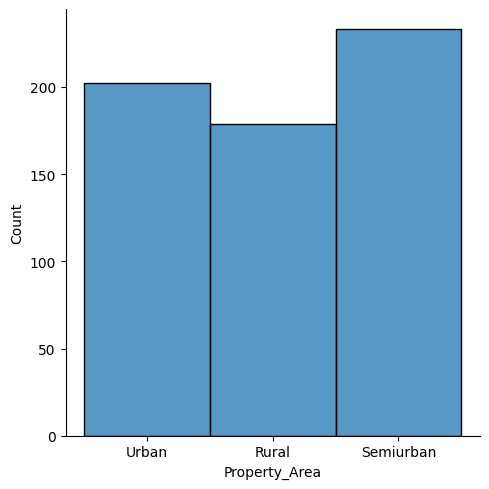

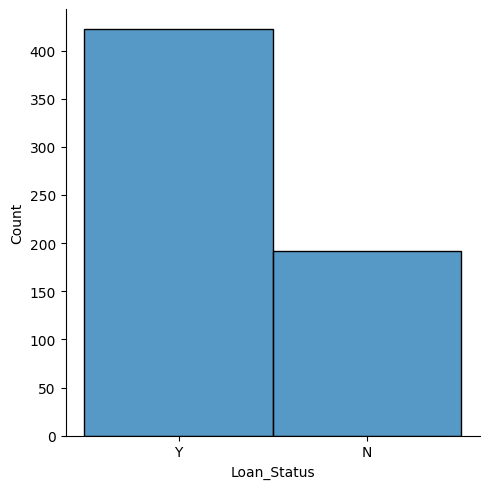

In [11]:
# creating a for loop to get the distribution plot for all columns
for column in loan_dataset:
  sns.displot(x=column, data=loan_dataset)

**Dealing with missing values**

In [48]:
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [49]:
# getting the missing value percentage
null_data = loan_dataset.isnull().sum()/614*100
print(null_data)

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64


In [50]:
# dropping the missing values
loan_dataset = loan_dataset.dropna()

In [51]:
# number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [52]:
loan_dataset.shape
# shows how many rows(entries) got removed


(480, 13)

**Dealing with Outliers**

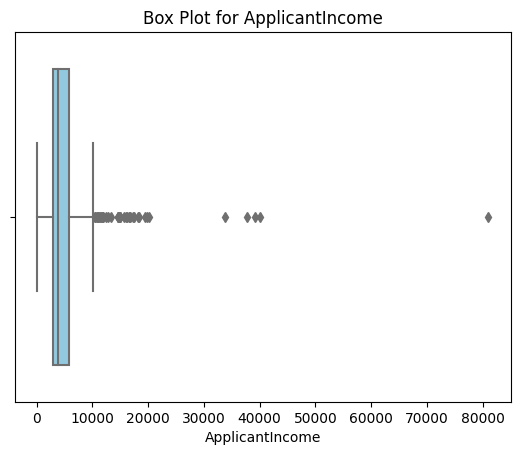

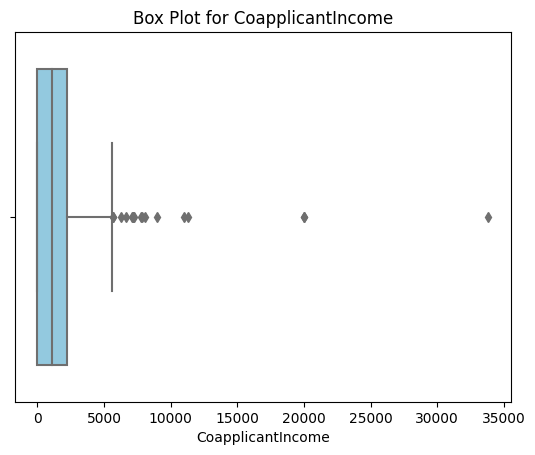

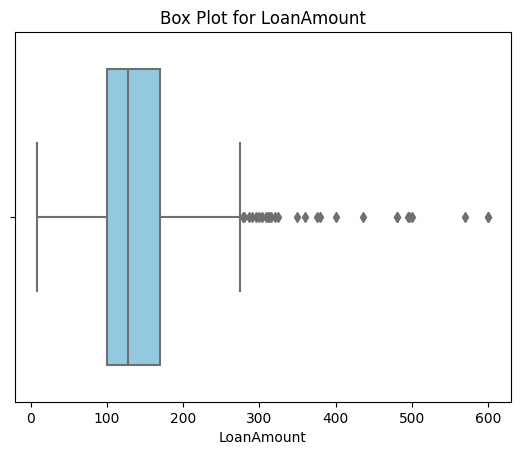

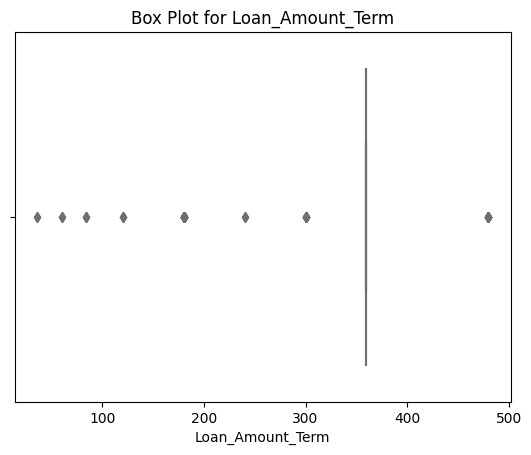

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_plot = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']

# Create separate box plots for each column
for column in columns_to_plot:
    plt.figure()
    sns.boxplot(x=column, data=loan_dataset, color='skyblue')
    plt.title(f'Box Plot for {column}')
    plt.show()


<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

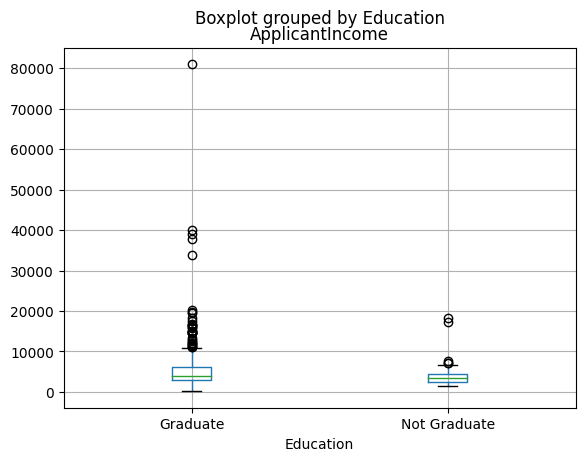

In [56]:
loan_dataset.boxplot(column='ApplicantIncome', by = 'Education')


We can see that there is no substantial different between the mean income of graduate and non-graduates. But graduates with a very high incomes are appearing to be the outliers



<Axes: title={'center': 'CoapplicantIncome'}, xlabel='Education'>

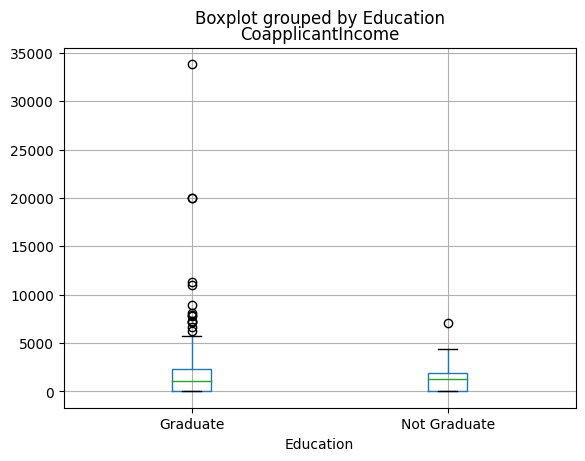

In [57]:
loan_dataset.boxplot(column='CoapplicantIncome', by = 'Education')

In [ ]:
#Even for Coapplicant Income gradudes are the majority outliers

<Axes: title={'center': 'ApplicantIncome'}, xlabel='Married'>

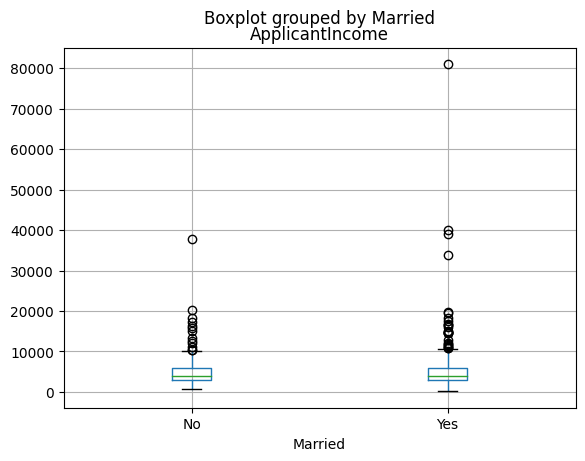

In [58]:
loan_dataset.boxplot(column='ApplicantIncome', by = 'Married')


both married and not married have equal share of outliers

The extreme values are practically possible, i.e. some people might apply for high value loans due to specific needs and graduates do tend to have extreme income in comparison to non graduates. So instead of treating them as outliers, let’s try a log transformation to nullify their effect

**Apply Log Transformation**


<ipython-input-59-dc6c12fdde22>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_dataset["ApplicantIncomeLog"])


<Axes: xlabel='ApplicantIncomeLog', ylabel='Density'>

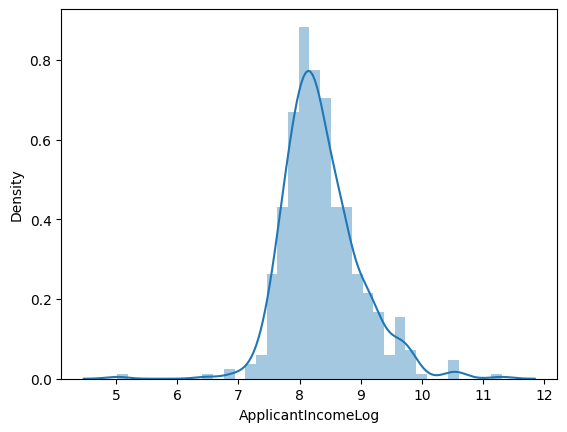

In [59]:
# apply log transformation to the attribute
loan_dataset['ApplicantIncomeLog'] = np.log(loan_dataset['ApplicantIncome']+1)
sns.distplot(loan_dataset["ApplicantIncomeLog"])

<ipython-input-62-6e0d6f8704d5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_dataset["CoapplicantIncomeLog"])


<Axes: xlabel='CoapplicantIncomeLog', ylabel='Density'>

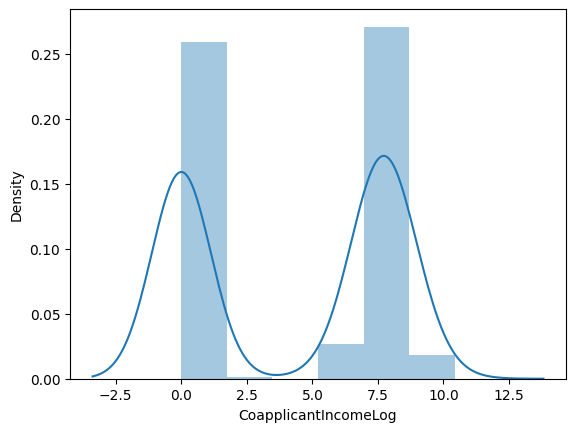

In [62]:
loan_dataset['CoapplicantIncomeLog'] = np.log(loan_dataset['CoapplicantIncome']+1)
sns.distplot(loan_dataset["CoapplicantIncomeLog"])

<ipython-input-61-85a821e86668>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_dataset["LoanAmountLog"])


<Axes: xlabel='LoanAmountLog', ylabel='Density'>

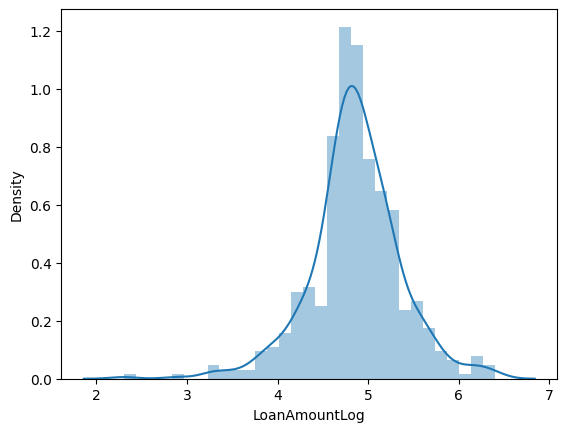

In [61]:
loan_dataset['LoanAmountLog'] = np.log(loan_dataset['LoanAmount']+1)
sns.distplot(loan_dataset["LoanAmountLog"])

<ipython-input-63-9f5b2e7e711b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_dataset["Loan_Amount_Term_Log"])


<Axes: xlabel='Loan_Amount_Term_Log', ylabel='Density'>

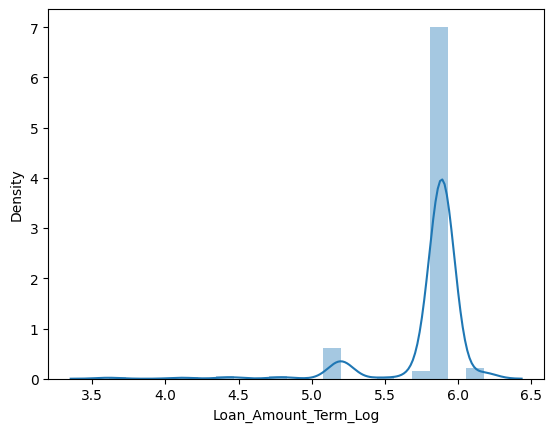

In [63]:
loan_dataset['Loan_Amount_Term_Log'] = np.log(loan_dataset['Loan_Amount_Term']+1)
sns.distplot(loan_dataset["Loan_Amount_Term_Log"])

**Class Imbalance**

<Axes: xlabel='Loan_Status', ylabel='count'>

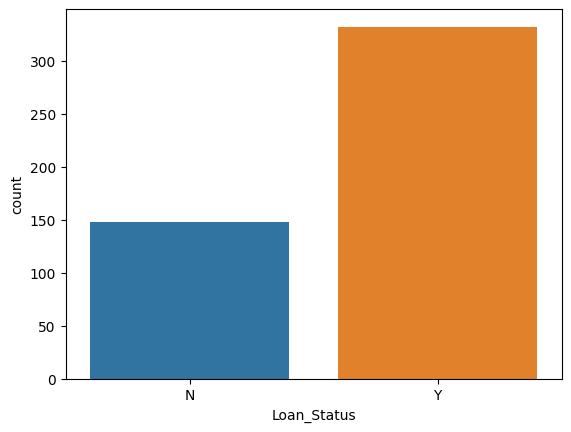

In [64]:
sns.countplot(x='Loan_Status', data=loan_dataset)
#class is imbalanced (can considee using SMOTE)

In [65]:
# grouping based on the class label 'loan_status' to compare means of the two class variables
loan_dataset.groupby('Loan_Status').mean()

<ipython-input-65-79cd2b4323c9>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  loan_dataset.groupby('Loan_Status').mean()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log
Loan_Status,,,,,,,,,
N,5730.189189,1773.081081,153.378378,342.810811,0.574324,8.357350,3.888486,4.900356,5.798988
Y,5201.093373,1495.508795,140.882530,341.710843,0.978916,8.352865,4.401849,4.838206,5.809721


**Corrleration Matrix**

<ipython-input-69-d504a5b5bc76>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = loan_dataset.corr()


<Axes: >

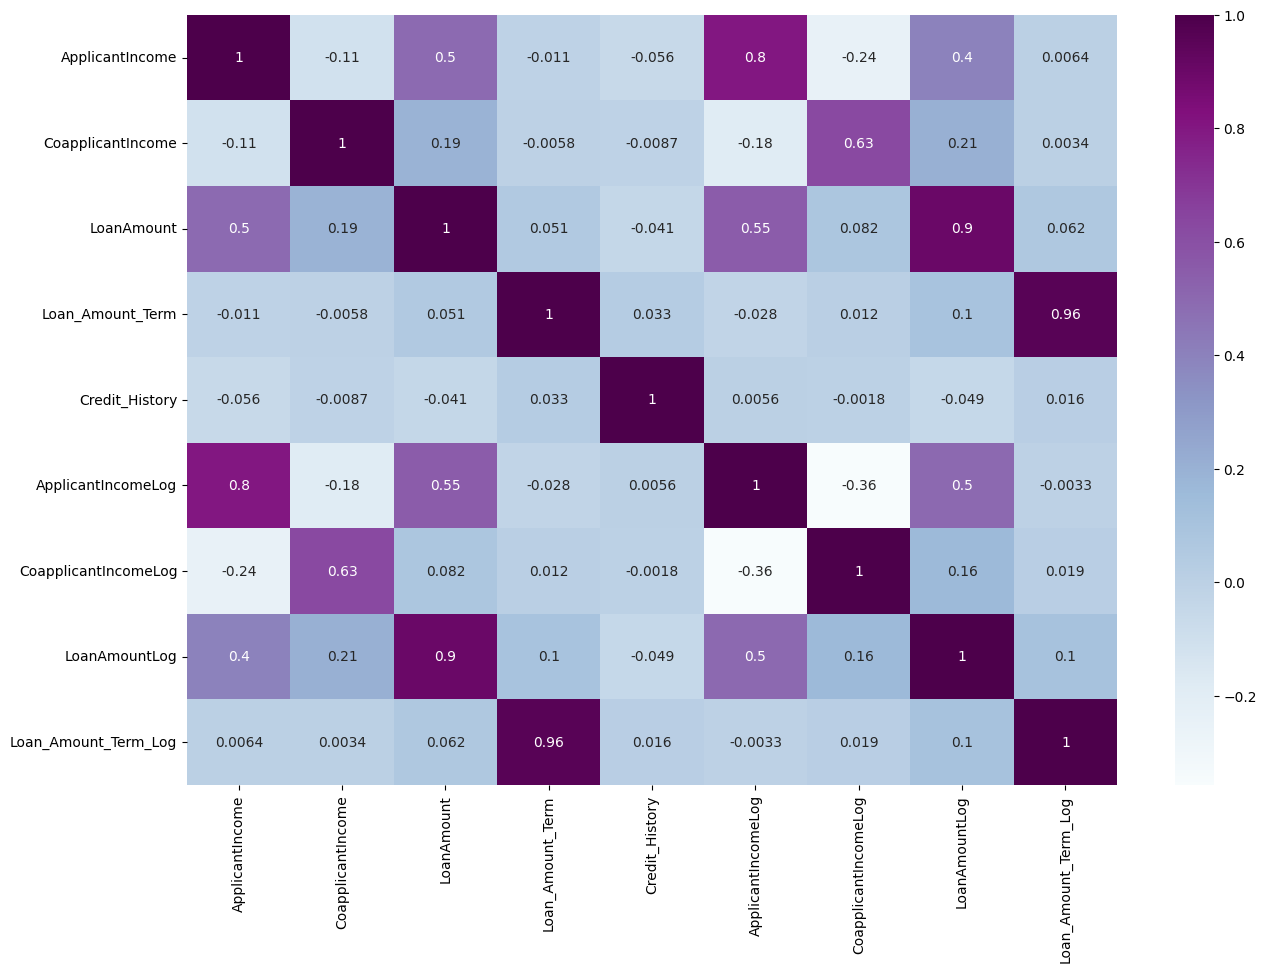

In [69]:
corr = loan_dataset.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="BuPu")

loan amount and applicant income does seem to have a correlation

In [84]:

import statsmodels.api as sm
from statsmodels.formula.api import ols


# Perform one-way ANOVA
model = ols('LoanAmount ~ ApplicantIncome', data=loan_dataset).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

                       sum_sq     df          F        PR(>F)
ApplicantIncome  7.616735e+05    1.0  155.39076  4.447413e-31
Residual         2.342996e+06  478.0        NaN           NaN


there is a significant association between loan amount and applicant Income

In [80]:

from scipy.stats import chi2_contingency


# Create a contingency table
contingency_table = pd.crosstab(loan_dataset['Married'], loan_dataset['Loan_Status'])

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-Square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)

Chi-Square Statistic: 5.557140235492528
P-value: 0.018405456386355375
Degrees of Freedom: 1
Expected Frequencies Table:
[[ 52.10833333 116.89166667]
 [ 95.89166667 215.10833333]]


The P value for Married in relation to Loan Status is below the threshold that means there is a significant association between them.

**Feature Selection**

In [86]:
# dropping unnecessary columns
cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", 'Loan_ID', 'LoanAmountLog']
loan_dataset = loan_dataset.drop(columns=cols, axis=1)
loan_dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,CoapplicantIncomeLog,Loan_Amount_Term_Log
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430327,7.319202,5.888878
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006701,0.000000,5.888878
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.857094,7.765993,5.888878
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699681,0.000000,5.888878
5,Male,Yes,2,Graduate,Yes,1.0,Urban,Y,8.597482,8.342125,5.888878


**Label Encoding**

In [88]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status","Dependents"]
le = LabelEncoder()
for col in cols:
    loan_dataset[col] = le.fit_transform(loan_dataset[col])

In [89]:
loan_dataset.head()


,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,CoapplicantIncomeLog,Loan_Amount_Term_Log
1,1,1,1,0,0,1.0,0,0,8.430327,7.319202,5.888878
2,1,1,0,0,1,1.0,2,1,8.006701,0.000000,5.888878
3,1,1,0,1,0,1.0,2,1,7.857094,7.765993,5.888878
4,1,0,0,0,0,1.0,2,1,8.699681,0.000000,5.888878
5,1,1,2,0,1,1.0,2,1,8.597482,8.342125,5.888878


In [90]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                480 non-null    int64  
 1   Married               480 non-null    int64  
 2   Dependents            480 non-null    int64  
 3   Education             480 non-null    int64  
 4   Self_Employed         480 non-null    int64  
 5   Credit_History        480 non-null    float64
 6   Property_Area         480 non-null    int64  
 7   Loan_Status           480 non-null    int64  
 8   ApplicantIncomeLog    480 non-null    float64
 9   CoapplicantIncomeLog  480 non-null    float64
 10  Loan_Amount_Term_Log  480 non-null    float64
dtypes: float64(4), int64(7)
memory usage: 45.0 KB


**Splitting The Dataset Into The Training Set And Test Set & Applying K-Fold Cross Validation**





In [93]:
# specify input and output attributes
X = loan_dataset.drop(columns=['Loan_Status'], axis=1)
y = loan_dataset['Loan_Status']

In [112]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [111]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
def classify_with_plot(model, x, y, max_folds=10):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test) * 100)

    # Try different numbers of folds and plot the results
    fold_range = range(2, max_folds + 1)
    mean_scores = []

    for folds in fold_range:
        score = cross_val_score(model, x, y, cv=folds)
        mean_scores.append(np.mean(score) * 100)

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(fold_range, mean_scores, marker='o', linestyle='-')
    plt.title('Cross-Validation Performance')
    plt.xlabel('Number of Folds')
    plt.ylabel('Mean Accuracy (%)')
    plt.show()

    # Print the results for the maximum number of folds
    print(f"Cross-validation with {max_folds} folds is", mean_scores[-1])




Accuracy is 80.0


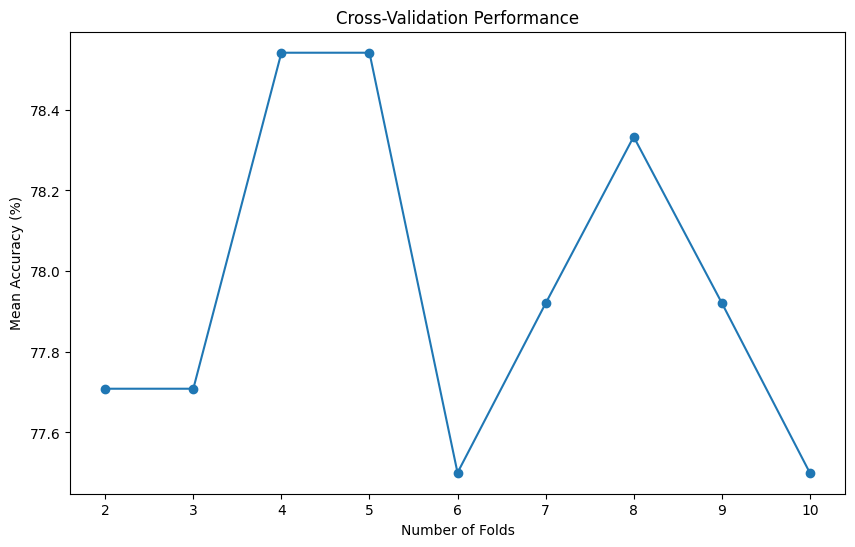

Cross-validation with 10 folds is 77.5


In [102]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier

# Create a RandomForestClassifier as an example model
rf_model = RandomForestClassifier(random_state=42)

# Use the classify_with_plot function
classify_with_plot(rf_model, X, y, max_folds=10)

In [118]:
scores = cross_val_score(rf_model, X, y, cv=4)
print(np.mean(scores)*100)

80.62499999999999


Accuracy is 74.16666666666667


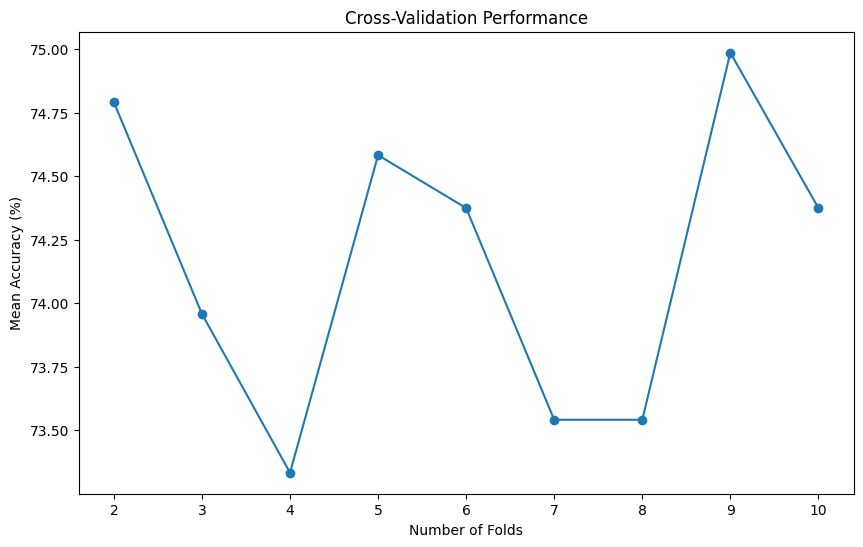

Cross-validation with 10 folds is 74.375


In [104]:
# Create a ExtraTreesClassifier as an example model
et_model = ExtraTreesClassifier(random_state=42)

# Use the classify_with_plot function
classify_with_plot(et_model, X, y, max_folds=10)

In [119]:
scores = cross_val_score(et_model, X, y, cv=7)
print(np.mean(scores)*100)

73.54159054926318


Accuracy is 74.16666666666667


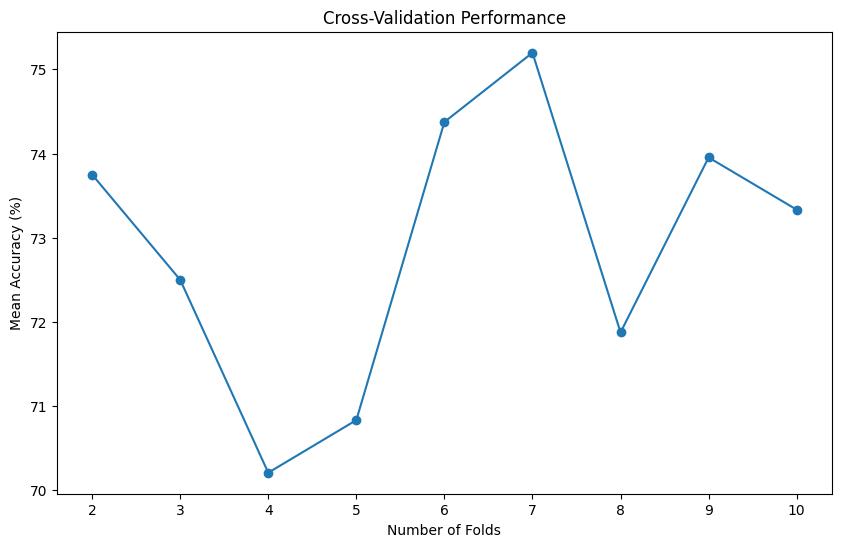

Cross-validation with 10 folds is 73.33333333333334


In [105]:
from sklearn.tree import DecisionTreeClassifier

# Create a DecisionTree as an example model
dt_model = DecisionTreeClassifier(random_state=42)

# Use the classify_with_plot function
classify_with_plot(dt_model, X, y, max_folds=10)

Accuracy is 77.5


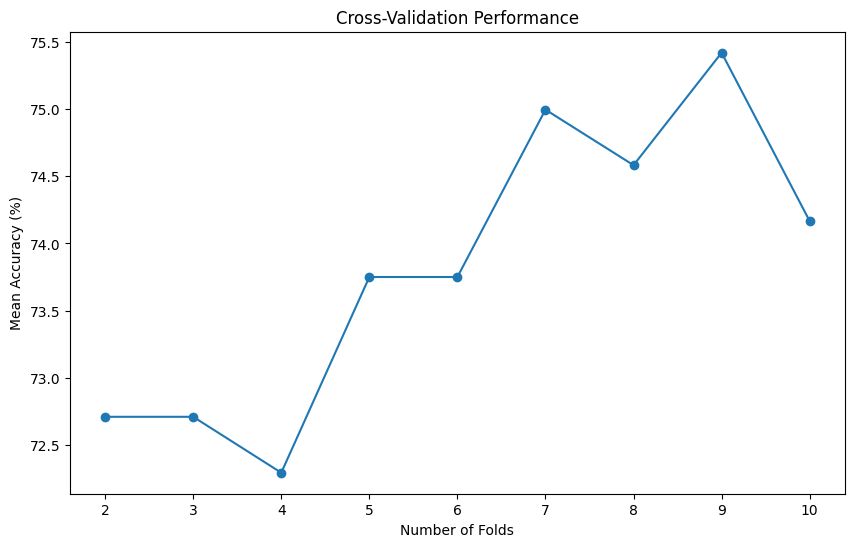

Cross-validation with 10 folds is 74.16666666666666
Accuracy is 76.66666666666667


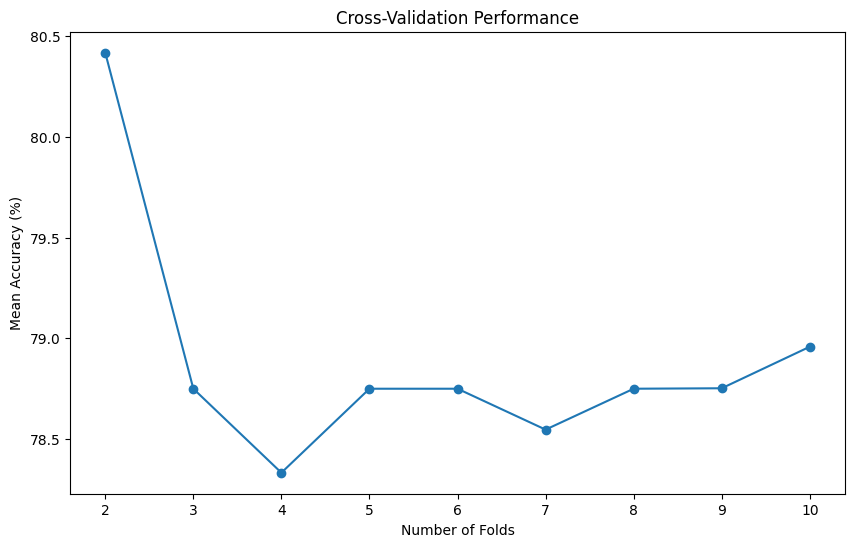

Cross-validation with 10 folds is 78.95833333333333


In [106]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Create a KNeighborsClassifier as an example model
knn_model = KNeighborsClassifier()

# Use the classify_with_plot function
classify_with_plot(knn_model, X, y, max_folds=10)

# Create a GradientBoostingClassifier as an example model
gbc_model = GradientBoostingClassifier(random_state=42)

# Use the classify_with_plot function
classify_with_plot(gbc_model, X, y, max_folds=10)


**Confusion Matrix**

Random forest

Confusion Matrix:
[[13 25]
 [ 1 81]]
Accuracy: 0.7833333333333333


<Axes: >

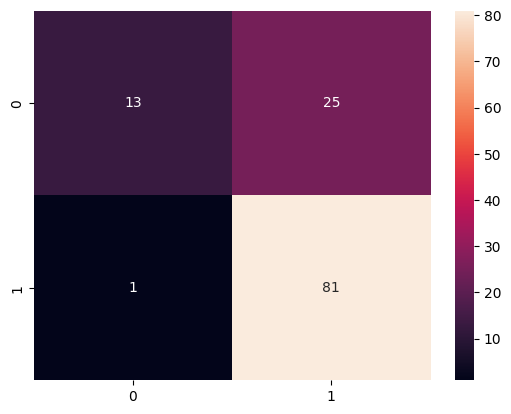

In [127]:
from sklearn.metrics import confusion_matrix

rf_model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=1, random_state=42)
rf_model.fit(x_train, y_train)

# Make predictions on new data
y_pred = rf_model.predict(x_test)

# Evaluate the model performance using metrics like confusion matrix, accuracy, etc.
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Calculate and display the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

sns.heatmap(conf_matrix, annot=True)


Decision Trees

Decision Tree Confusion Matrix:
[[16 22]
 [ 9 73]]
Decision Tree Accuracy: 0.7416666666666667


<Axes: >

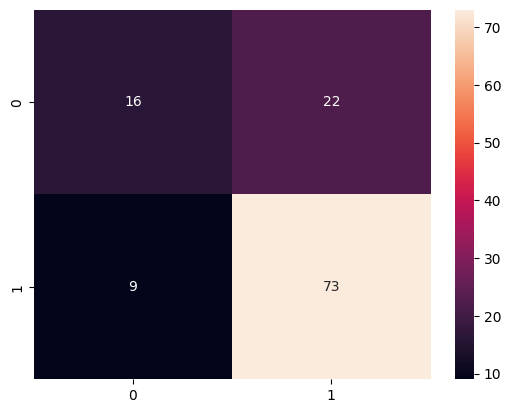

In [120]:
dt_model.fit(x_train, y_train)

y_pred_dt = dt_model.predict(x_test)

conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

print("Decision Tree Confusion Matrix:")
print(conf_matrix_dt)


accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)
sns.heatmap(conf_matrix_dt, annot=True)

Extra Trees

Extra Trees Confusion Matrix:
[[14 24]
 [ 7 75]]
Extra Trees Accuracy: 0.7416666666666667


<Axes: >

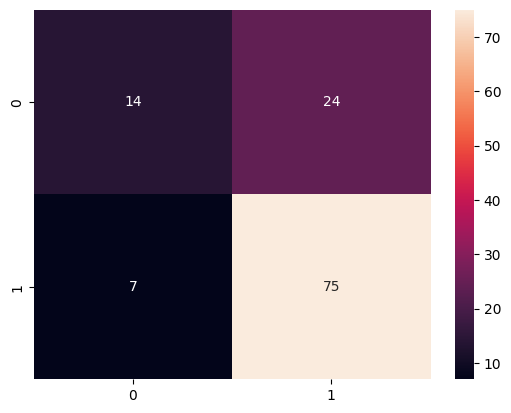

In [121]:
et_model = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Fit the model
et_model.fit(x_train, y_train)

# Make predictions on new data
y_pred_et = et_model.predict(x_test)

# Evaluate the model performance using metrics like confusion matrix, accuracy, etc.
conf_matrix_et = confusion_matrix(y_test, y_pred_et)

# Display the confusion matrix
print("Extra Trees Confusion Matrix:")
print(conf_matrix_et)

# Calculate and display the accuracy
accuracy_et = accuracy_score(y_test, y_pred_et)
print("Extra Trees Accuracy:", accuracy_et)
sns.heatmap(conf_matrix_et, annot=True)


KNN

KNN Confusion Matrix:
[[14 24]
 [ 3 79]]
KNN Accuracy: 0.775


<Axes: >

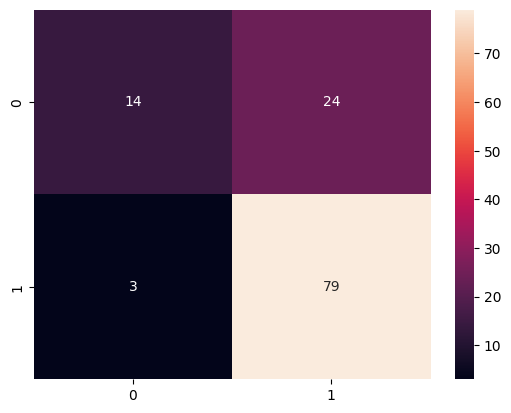

In [122]:

# Create a KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)

# Fit the model
knn_model.fit(x_train, y_train)

# Make predictions on new data
y_pred_knn = knn_model.predict(x_test)

# Evaluate the model performance using metrics like confusion matrix, accuracy, etc.
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Display the confusion matrix
print("KNN Confusion Matrix:")
print(conf_matrix_knn)

# Calculate and display the accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)
sns.heatmap(conf_matrix_knn, annot=True)


Gradient Boosting Classifier

Gradient Boosting Confusion Matrix:
[[12 26]
 [ 2 80]]
Gradient Boosting Accuracy: 0.7666666666666667


<Axes: >

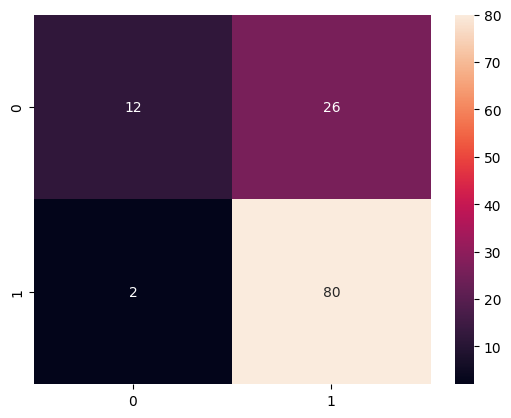

In [123]:

# Create a GradientBoostingClassifier
gbc_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit the model
gbc_model.fit(x_train, y_train)

# Make predictions on new data
y_pred_gbc = gbc_model.predict(x_test)

# Evaluate the model performance using metrics like confusion matrix, accuracy, etc.
conf_matrix_gbc = confusion_matrix(y_test, y_pred_gbc)

# Display the confusion matrix
print("Gradient Boosting Confusion Matrix:")
print(conf_matrix_gbc)

# Calculate and display the accuracy
accuracy_gbc = accuracy_score(y_test, y_pred_gbc)
print("Gradient Boosting Accuracy:", accuracy_gbc)
sns.heatmap(conf_matrix_gbc, annot=True)


**ENSEMBLE (ALL MODELS)**

Ensemble Confusion Matrix:
[[12 26]
 [ 2 80]]
Ensemble Accuracy: 0.7666666666666667


<Axes: >

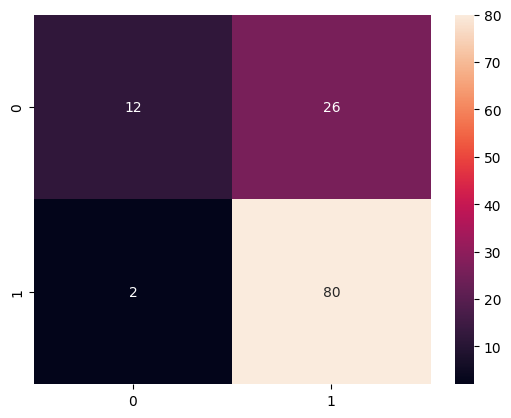

In [125]:
from sklearn.ensemble import VotingClassifier
# Create an ensemble of models
ensemble_model = VotingClassifier(
    estimators=[
        ('DecisionTree', dt_model),
        ('ExtraTrees', et_model),
        ('RandomForest', rf_model),
        ('KNN', knn_model),
        ('GBC', gbc_model)
    ],
    voting='hard'  # 'hard' for majority voting, 'soft' for weighted voting
)

# Fit the ensemble model
ensemble_model.fit(x_train, y_train)

# Make predictions on new data
y_pred_ensemble = ensemble_model.predict(x_test)

# Evaluate the ensemble model performance using metrics like confusion matrix, accuracy, etc.
conf_matrix_ensemble = confusion_matrix(y_test, y_pred_ensemble)

# Display the confusion matrix
print("Ensemble Confusion Matrix:")
print(conf_matrix_ensemble)

# Calculate and display the accuracy
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
print("Ensemble Accuracy:", accuracy_ensemble)

# Visualize the confusion matrix using seaborn heatmap
sns.heatmap(conf_matrix_ensemble, annot=True)

**ENSEMBLE( TOP 2 MODELS)**

Ensemble of top 2 accurate model which are random forest and KNN.
(Just like in all research papers random forest has the highest accuracy)

Ensemble Confusion Matrix:
[[18 20]
 [ 4 78]]
Ensemble Accuracy: 0.8


<Axes: >

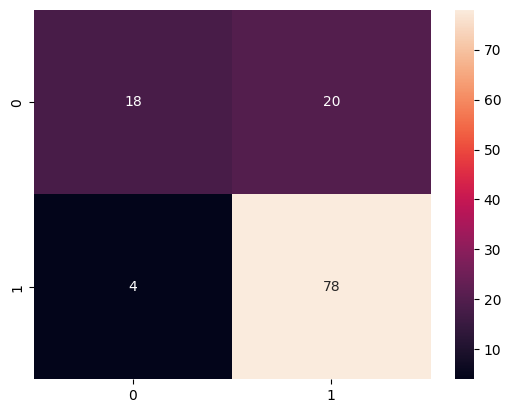

In [126]:
# Create an ensemble of Random Forest and KNN
ensemble_model = VotingClassifier(estimators=[('RandomForest', rf_model), ('KNN', knn_model)], voting='hard')

# Fit the ensemble model
ensemble_model.fit(x_train, y_train)

# Make predictions on new data
y_pred_ensemble = ensemble_model.predict(x_test)

# Evaluate the ensemble model performance using metrics like confusion matrix, accuracy, etc.
conf_matrix_ensemble = confusion_matrix(y_test, y_pred_ensemble)

# Display the confusion matrix
print("Ensemble Confusion Matrix:")
print(conf_matrix_ensemble)

# Calculate and display the accuracy
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
print("Ensemble Accuracy:", accuracy_ensemble)

# Visualize the confusion matrix using seaborn heatmap
sns.heatmap(conf_matrix_ensemble, annot=True)

this ensemble seems to have the highest accuracy in comparison to individual models and the ensemble of all the models.

Futhermore this process shall be repeated without any feature selection and keeping all the attributes for further comparison